<center> <h1>OktóbeR</h1> </center>

<font size="4">Az exploratory data analysis, röviden EDA az adat megismerésére irányuló módszer, aminek fontos eleme a vizualizáció. Az EDA alapvető fontosságú első lépés, megalapozza az adattisztítást, az adattranszformációt és a hipotézis felállítását. Miért? Mert ahhoz, hogy az adatot megtisztítsuk, tudnunk kell hol „piszkos” és milyen problémák vannak vele, az adatok transzformálása előtt pedig érdemes megismerni, hogy milyen értékekből tudunk dolgozni. A folyamat másik célja mintázatok, összefüggések megfigyelése az adathalmazban, amik mentén az elemzés későbbi lépéseiben tovább haladhatunk.</font>

In [1]:
summary(anscombe[,grep('x', colnames(anscombe))])

       x1             x2             x3             x4    
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19  

In [2]:
 summary(anscombe[,grep('y', colnames(anscombe))])

       y1               y2              y3              y4        
 Min.   : 4.260   Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.: 6.315   1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median : 7.580   Median :8.140   Median : 7.11   Median : 7.040  
 Mean   : 7.501   Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.: 8.570   3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :10.840   Max.   :9.260   Max.   :12.74   Max.   :12.500  

In [3]:
 sapply(grep('x', colnames(anscombe)), function(x){var(anscombe[,x])})

[1] 11 11 11 11

In [4]:
sapply(grep('y', colnames(anscombe)), function(x){var(anscombe[,x])})

[1] 4.127269 4.127629 4.122620 4.123249

<img src="eda.png">

## 1. A szükséges könyvtárak beimportálása és a fájl beolvasása és megtekintése

In [145]:
library(data.table) #adatsruktúra
library(dplyr) #adatmanipulciós eszközök
library(ggplot2) #adatvizualizáció
library(tidyr) #adattisztítás

cocktails <- fread('./Cocktails.csv')
cocktails

Cocktail Name,Bartender,Company,Location,Ingredients,Garnish,Glassware,OfficialRating,AgeOfBartender
Nara Mule,Eduardo Val Naval,A Japanese Kirikata,Spain,"2 Kumquats, 2 Lychee, 2 oz Bulleit Rye, 1 oz King's Ginger Liqueur, .75 oz Fresh Lemon Juice, .5 oz Simple Syrup, .5 oz Egg White, .5 oz Fever Tree Ginger Beer","Kumquats Skewer, Pansy Petal",Highball Glass,8,28
Venetian,,Absinthe Brasserie & Bar,san fransisco,".5 oz Luxardo Amaretto di Saschira, .5 oz Campari, .5 oz Dry Vermouth",Lemon Zest,N/A,6,32
Gin n' Celery,,ABV,San Francisco,"1.5 oz Old Tom Gin, .75 oz Lemon Juice, .5 oz Small Hand Foods Gum Syrup, 7 dash Celery Bitters, 1 oz Tonic Water, 1 pinch Salt",Lemon Peel (Bitter Covered),Double Rocks Glass,6,43
Buster Crusta,Ryan Fitzgerald,ABV,San Francisco,"2 oz H by HINE, 1 oz Lemon Juice, .75 oz The Genuine Curacao Liqueur Orange, .5 oz Luxardo Maraschino Liqueur, .5 oz Small Hand Foods Gum Syrup, 1 bsp Luxardo Fernet",,Coupe,7,19
Where's the Orgeat?,Jackie Goldstein,ABV,San Francisco,"2 oz H by HINE, 1 oz Small Hand Foods Orgeat, .75 oz Lemon Juice, .5 oz Luxardo Apricot Liqueur, 3 dash Angostura Bitters",Lemon Twist,Coupe,7,42
Kentucky Mai Tai,,Ace Hotel,Los Angeles,"1 oz Mezcal, 1 oz Bourbon, .5 oz Lemon, .5 oz Peche de Vigne, .5 oz Cynar, .5 oz Orgeat, 4 dash Angostura Bitters","Mint Sprig, Cherry",Highball Glass,5,23
Floral Summer,Duane Fernandez,ACME,New York,"1.5 oz No.3 London Dry Gin, .5 oz Honey syrup , .75 oz Fresh lemon syrup , Tarragon leaves, Lavender bitters",,Martini,6,27
A Botanical Garden,Danny Louie,Alembic,San Francisco,"1.5 oz Hophead Vodka, .75 oz Zirbenz Stone Pine, .75 oz Fresh Strawberry Juice w/ Xanthan Gum*, .75 oz Lemon Juice, .5 oz Simple Syrup",Mint Sprig,Old Fashioned Glass,10,28
Bunny Poison,,Alta CA,San Francisco,"2 oz Rhubarb Cucumber & Mint-Infused Junipero Gin, .75 oz Lemon Juice, .75 oz Tempus Fugit Alessio Vermouth Bianco, .5 oz Rhubarb Juice, .5 oz Grapefruit Juice, .5 oz Rhubarb Syrup, 2 dash Fee Brothers Celery Bitters",Cucumber Peel,Cocktail Glass,8,31
Pineapple Express,Jim Meehan,American Express Centurion Lounge,San Francisco,"1 oz Charbay Ruby Red Grapefruit Vodka, 1 oz Vya Dry Vermouth, .75 oz Hophead Vodka, .25 oz Small Hand Foods Pineapple Gum Syrup",Grapefruit Twist,Coupe,5,39


## 2. A struktúra megismerése

<font size="4"> Első körben szeretnénk megnézni, hogy:

1. hány sorunk van
2. hány oszlopunk van
3. milyen nevű oszlopaink vannak
4. ezek milyen típusú adatokat tartalmaznak 
5. mekkora a duplikációszám </font>

<font size="4">Az str() függvény ezek küzül az összes, a summary() függvénypedig közvetelnül a 3., közvetetten az első 2 és a 4. kérdést megválaszolja.</font>

In [146]:
str(cocktails)
summary(cocktails)

Classes ‘data.table’ and 'data.frame':	689 obs. of  9 variables:
 $ Cocktail Name : chr  "Nara Mule" "Venetian" "Gin n' Celery" "Buster Crusta" ...
 $ Bartender     : chr  "Eduardo Val Naval" "" "" "Ryan Fitzgerald" ...
 $ Company       : chr  "A Japanese Kirikata" "Absinthe Brasserie & Bar" "ABV" "ABV" ...
 $ Location      : chr  "Spain" "san fransisco" "San Francisco" "San Francisco" ...
 $ Ingredients   : chr  "2  Kumquats, 2  Lychee, 2 oz Bulleit Rye, 1 oz King's Ginger Liqueur, .75 oz Fresh Lemon Juice, .5 oz Simple Sy"| __truncated__ ".5 oz Luxardo Amaretto di Saschira, .5 oz Campari, .5 oz Dry Vermouth" "1.5 oz Old Tom Gin, .75 oz Lemon Juice, .5 oz Small Hand Foods Gum Syrup, 7 dash Celery Bitters, 1 oz Tonic Wat"| __truncated__ "2 oz H by HINE, 1 oz Lemon Juice, .75 oz The Genuine Curacao Liqueur Orange, .5 oz Luxardo Maraschino Liqueur, "| __truncated__ ...
 $ Garnish       : chr  "Kumquats Skewer, Pansy Petal" "Lemon Zest" "Lemon Peel (Bitter Covered)" "" ...
 $ Glassware   

 Cocktail Name       Bartender           Company            Location        
 Length:689         Length:689         Length:689         Length:689        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Ingredients          Garnish           Glassware         OfficialRating  
 Length:689         Length:689         Length:689         Min.   : 2,000  
 Class :character   Class :character   Class :character   1st Qu.: 5,000  
 Mode  :character   Mode  :character   Mode  :character   Median : 6,000  
                                                          Mean   : 6,544  
         

<font size="4">Ezeket én kevésbé kedvelem, sok oszlop esetén nem átlátható az eredményük. <br>
A válaszokat jobban szeretem külön megkapni, úgy mint:</font>

In [147]:
row_count <- nrow(cocktails)
col_count <- ncol(cocktails)
col_type <- sapply(cocktails, typeof)
duplication_count <- nrow(cocktails) - uniqueN(cocktails)

cat("1. Sorok száma: ", row_count)
cat("\n")
cat("2. Oszlopok száma: ", col_count)
cat("\n")
cat("3. Oszlopnevek:")
colnames(cocktails)
cat("3-4. Oszlopnevek és az adatok típusa:")
col_type
cat("5. Duplikációszám: ", duplication_count)

1. Sorok száma:  689
2. Oszlopok száma:  9
3. Oszlopnevek:

[1] "Cocktail Name"  "Bartender"      "Company"        "Location"      
[5] "Ingredients"    "Garnish"        "Glassware"      "OfficialRating"
[9] "AgeOfBartender"

3-4. Oszlopnevek és az adatok típusa:

Cocktail Name      Bartender        Company       Location    Ingredients 
   "character"    "character"    "character"    "character"    "character" 
       Garnish      Glassware OfficialRating AgeOfBartender 
   "character"    "character"      "integer"      "integer"

5. Duplikációszám:  1

<font size=4>A sorok száma egyenlőre tartalmazza a duplikációkat is, illetve a duplikációszám még félrevezethető lehet, mert a unique() és a uniqueN() függvény egyedinek kezel minden olyan értéket, ami mint szöveg egyedi</font>

<font size="4">Az oszlopok neveit nézve látszik, hogy praktikus lenne átnevezni az első oszlopot. Ha nem férünk hozzá a forrásfájlhoz, vagy nem akarjuk módosítani, ezt az R-en belül is megtehetjük, többféleképpen. A legegyszerűbben talán a dplyr könyvtárral.</font>

In [148]:
cocktails <- cocktails %>% 
  rename(
    CoktailName = "Cocktail Name"
    )

<font size="4">Ha szeretnénk törölhetünk oszlopokat az adattáblából.</font>

In [149]:
cocktails <- select(cocktails,-c(Ingredients, Garnish))

## 3. Az értékek megsimerése

<font size="4">
Az értékek megismerését is megközelíthetjük egyből a számok oldaláról. Fontos tudnunk, hogy: <br>    

6. mekkora az különböző értékek száma oszloponként
7. mekkora a hiányzó adat mértéke oszloponként</font>

<font size="4">A különböző és a hiányzó értékek számának meghatározására is létezik függvény R-ben,</font>

In [150]:
unique_count <- sapply(cocktails, function(y) uniqueN(y))
na_count <-sapply(cocktails, function(y) sum(length(which(is.na(y)))))

cat("6. Különböző értékek száma oszloponként:")
unique_count
cat("7. A hiányzó értékek száma oszloponként:")
na_count

6. Különböző értékek száma oszloponként:

CoktailName      Bartender        Company       Location      Glassware 
           685            257            179             64             18 
OfficialRating AgeOfBartender 
            10             51

7. A hiányzó értékek száma oszloponként:

CoktailName      Bartender        Company       Location      Glassware 
             0              2              4              4              2 
OfficialRating AgeOfBartender 
            31              8

<font size="4">de félrevezethetőek lehetnek, mert ahogy korábban írtam, a unique() és a uniqueN() függvény egyedinek kezel minden olyan értéket, ami mint szöveg egyedi</font>

In [100]:
unique(cocktails$Location)

[1] "Spain"           "san fransisco"   "San Francisco"   "Los Angeles"    
 [5] "New York"        "Alameda"         "Chicago"         "new york"       
 [9] "New Zealand"     "Houston"         "Seattle"         "Somerville"     
[13] "chicago"         "atlanta"         "san francisco"   ""               
[17] "Austin"          "austin"          "Milwaukee"       "Boston"         
[21] "Washington DC"   "Denver"          "Atlanta"         "portland"       
[25] "San fransisco"   "Nashville"       "New Orleans"     "Anaheim"        
[29] "Dallas"          "Portland"        "Carlsbad"        "Brooklyn"       
[33] "United Kingdom"  "N/A"             "na"              NA               
[37] "NAN"             "nan"             "Nan"             "Westport"       
[41] "westport"        "San Luis Obispo" "NULL"            "null"           
[45] "St. Louis"       "Philadelphia"    "Fort Worth"      "Sacramento"     
[49] "Las Vegas"       "San Diego"       "Miami"           "Los Gatos"      
[53] "Charleston"      "Phoenix"         "boston"          "brooklyn"       
[57] "Japan"           "los angeles"     "denver"          "Pacifica"       
[61] "UK"              "united Kingdom"  "miami"           "London"

<font size="4">és mert a hiányzó értéket sokféleképpen jelölhetik, az is.na() függvény viszont csak az "NA" értékeket számolja össze.</font>

In [101]:
tail(cocktails, 3)

CoktailName,Bartender,Company,Location,Glassware,OfficialRating,AgeOfBartender
Margarita,,,,Old Fashioned Glass,10,29
Margarita,,,,Old Fashioned Glass,10,29
margarita,,,,Old Fashioned Glass,10,29


In [102]:
cocktails$Bartender[is.na(cocktails$Bartender)]
cocktails$Bartender[cocktails$Bartender == "null" | cocktails$Bartender == "nan"]

[1] NA NA

[1] NA     NA     "nan"  "nan"  "nan"  "null" "null" "null" "null" "null"
[11] "null" "null"

<font size="4">A kérdések pontosabb megválaszolásához és egyébként a későbbi elemzések sikere érdekében saját függvényeket kell írnunk, amik úgy alakítják át az adatot, hogy a beépített fügvényekkel pontos válaszokat kapjunk. Ezekhez pedig pontosabban ismernünk kell az értékeket. <br>
Mivel a beépített függvényeket még használni fogom egy függvénybe rakom őket.
</font>

In [151]:
desc_stat <- function(df){
    duplication_count <- nrow(df) - uniqueN(df)
    unique_count <- sapply(df, function(y) uniqueN(y))
    na_count <-sapply(df, function(y) sum(length(which(is.na(y)))))
    row_count <- nrow(df)
    col_count <- ncol(df)
    col_type <- sapply(df, typeof)

    cat("1. Sorok száma: ", row_count)
    cat("\n")
    cat("2. Oszlopok száma: ", col_count)
    cat("\n")
    cat("3-4. Oszlopnevek és az adatok típusa:")
    cat(col_type)
    cat("\n")
    cat("5. Duplikációszám: ", duplication_count)
    cat("\n")
    cat("6. Különböző értékek száma oszloponként:")
    cat(unique_count)
    cat("\n")
    cat("7. A hiányzó értékek száma oszloponként:")
    cat(na_count)
}

## 4. Vizualizációs eszközök

### Mérési szintek

<font size="4">Alpvetően 4 mérési szintet különböztetünk meg. <br>

- **nominális**: a változó értékei nem sorbarendezhetőek, nem végezhetőek rajtuk számítások.
- **ordinális**: a változó értékei között van hierarchia, de nem végezhetőek rajtuk számítások.

Ezeket közösen alacsony mérési szintű változóknak nevezzük. <br>

- **intervallum-skála**: a változó értékei sorbarendezhetőek, értelmezhető rajtuk az összeadás és a kivonás, de a szorzás és az osztás nem, mert a 0 önkényesen választott.
- **arány-skála**: a változó értékei sorbarendezhetőek és mind a négy matematikai alapművelet értelmezhető rajtuk. 

Ezeket közösen magas mérési szintű változóknak nevezzük.</font>

<font size="4" color = "green">A mi esetünkben melyik oszlopot milyen mérési szintűnek kategorizálnánk?</font>

### Mérési szintek és vizualizáció

<font size=4> Az alacsony mérési szintű változók ábrázolásához a két legáltalánosabb vizualizáviós eszköz a Pie Chart </font>

In [105]:
create_pie <- function(column, title = "Pie") {
    c <- table(column)
    l <- paste(names(c), "\n", c, sep="")
    pie(c, labels = l, 
    main=title)
}

<font size=4> és a Bar Plot</font>

In [160]:
create_bar <- function(column, title = "Bar", horiz = FALSE){
    c <- table(column)
    barplot(c, main=title, horiz=horiz, las = 2)
}

<font size=4> A magas mérési szintű változók esetében a változó értékeinek eloszlását vizsgáljuk. <br> Erre jó eszköz egy egyszerű Boxplot,</font>

In [202]:
create_box <- function(column, title = "Box", notch = FALSE, xlabel = "", ylabel = ""){
    boxplot(column, main=title, notch = notch,
    xlab=xlabel, ylab=ylabel)
}

<font size=4> a Violinplot,</font>

In [191]:
create_violin <- function(column, plotcolor = "LightGreen", boxcolor = "red", func = mean, geoms = "point", geom_size = 14, geom_color = "blue"){    
ggplot(cocktails, aes(x="", y = column)) +
    geom_violin(fill= plotcolor) +
    geom_boxplot(width=0.1, color=boxcolor, alpha=0.2) +
    stat_summary(fun.y=func, geom=geoms, shape=20, size=geom_size, color=geom_color)
}

<font size=4>vagy a Kummulatív Eloszlás Függvény. </font>

In [109]:
create_ecdf <- function(column, title = "ecdf"){
    plot(ecdf(column), main = title)
}

<font size=4>Ezekkel a vizualizációkkal könnyebben kiszűrhetjük a null értékeket és az adatokat látva eldönthetjük, vannak-e értékek, amik valójában ugyanazt jelentik, csak máshogy írták/máshogy jelölték őket. Ezek a vizualizációk segíthetnek olyan függvények megírásában, amik alkalmazása után a feltett kérdésekre pontosabb választ kaphatunk. </font>

## 5. Adattisztítás

<font size= 4>Szeretném, ha az eredeti dataframe-et nem érintenék ezek a változások, ezért egy új dataframe-et hozok létre, amiben mindent kisbetűssé teszek és eldobom a duplikációkat.
</font>

In [152]:
cocktails_clean <- cocktails %>% mutate(CoktailName = tolower(CoktailName), Bartender = tolower(Bartender), 
                          Company = tolower(Company), Location = tolower(Location),
                          Glassware = tolower(Glassware)) %>% distinct()

<font size=4>Ezek után a statisztikánk már máshogy nézki. A duplikációk elvetésével csökkent a sorok száma, a kisbetűssé tétellel pedig a különböző értékek száma.</font>

In [153]:
desc_stat(cocktails)

1. Sorok száma:  689
2. Oszlopok száma:  7
3-4. Oszlopnevek és az adatok típusa:character character character character character integer integer
5. Duplikációszám:  1
6. Különböző értékek száma oszloponként:685 257 179 64 18 10 51
7. A hiányzó értékek száma oszloponként:0 2 4 4 2 31 8

In [154]:
desc_stat(cocktails_clean)

1. Sorok száma:  687
2. Oszlopok száma:  7
3-4. Oszlopnevek és az adatok típusa:character character character character character integer integer
5. Duplikációszám:  0
6. Különböző értékek száma oszloponként:684 252 171 47 17 10 51
7. A hiányzó értékek száma oszloponként:0 2 4 4 2 31 8

<font size=4>Itt az ideje jobban megnézni az értékeket.</font>

In [113]:
colnames(cocktails_clean)

[1] "CoktailName"    "Bartender"      "Company"        "Location"      
[5] "Glassware"      "OfficialRating" "AgeOfBartender"

### Location

In [114]:
unique(cocktails_clean$Location)

[1] "spain"           "san fransisco"   "san francisco"   "los angeles"    
 [5] "new york"        "alameda"         "chicago"         "new zealand"    
 [9] "houston"         "seattle"         "somerville"      "atlanta"        
[13] ""                "austin"          "milwaukee"       "boston"         
[17] "washington dc"   "denver"          "portland"        "nashville"      
[21] "new orleans"     "anaheim"         "dallas"          "carlsbad"       
[25] "brooklyn"        "united kingdom"  "n/a"             "na"             
[29] NA                "nan"             "westport"        "san luis obispo"
[33] "null"            "st. louis"       "philadelphia"    "fort worth"     
[37] "sacramento"      "las vegas"       "san diego"       "miami"          
[41] "los gatos"       "charleston"      "phoenix"         "japan"          
[45] "pacifica"        "uk"              "london"

<font size=4>Jól látszik, hogy a null értéket többféleképpen jelölték az oszlopban. Az n/a, az na, a nan és a null mind erre utalhatnak, ahogy a kiszűrt "" is. Első körben módosítsuk ezeket az értékeket NA-ra.</font>

In [161]:
cocktails_clean$Location[cocktails_clean$Location == "" | cocktails_clean$Location == "nan" | cocktails_clean$Location == "n/a" | cocktails_clean$Location == "na" | cocktails_clean$Location == "null"] <- NA

In [162]:
desc_stat(cocktails_clean)

1. Sorok száma:  687
2. Oszlopok száma:  7
3-4. Oszlopnevek és az adatok típusa:character character character character character integer integer
5. Duplikációszám:  0
6. Különböző értékek száma oszloponként:684 252 171 40 17 10 51
7. A hiányzó értékek száma oszloponként:0 2 4 345 2 31 8

<font size=4>Ami még látszik, hogy san francisco neve elírva is szerepel, a 'uk' pedig a 'united kingdom'-ra utalhat. Ezeket javítsuk.</font>

In [163]:
cocktails_clean$Location[cocktails_clean$Location == "san fransisco"] <- "san francisco"

In [164]:
cocktails_clean$Location[cocktails_clean$Location == "uk"] <- "united kingdom"

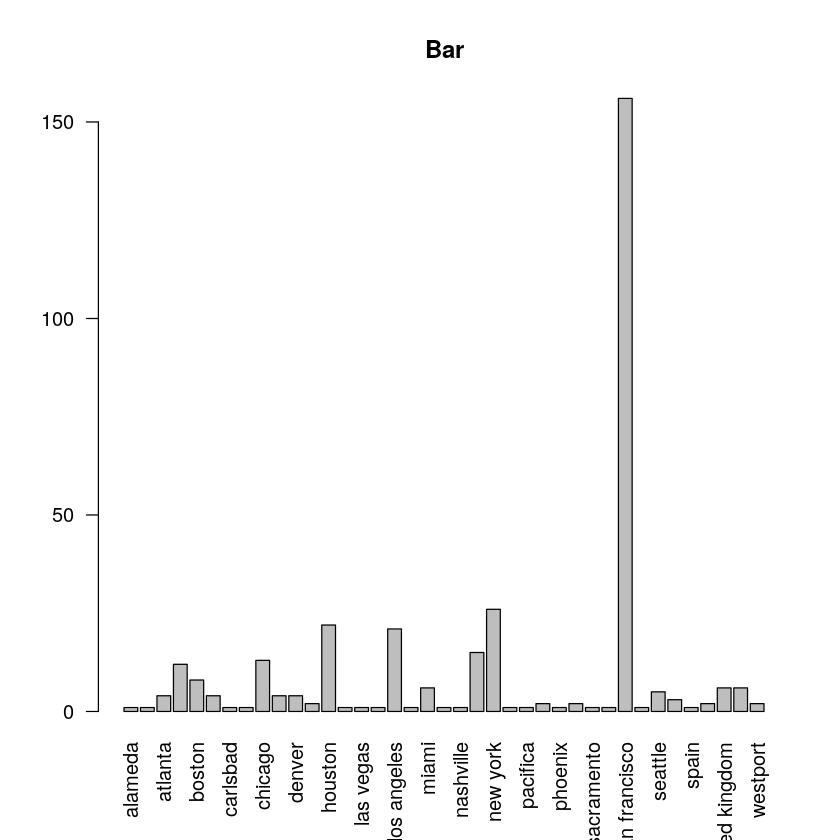

In [166]:
create_bar(cocktails_clean$Location)

### Glassware

In [127]:
unique(cocktails_clean$Glassware)

[1] "highball glass"      NA                    "double rocks glass" 
 [4] "coupe"               "martini"             "old fashioned glass"
 [7] "cocktail glass"      "collins"             "nick & nora"        
[10] "rocks glass"         "champagne flute"     "wine glass"

In [121]:
cocktails_clean$Glassware[cocktails_clean$Glassware == "" | cocktails_clean$Glassware == "nan" | cocktails_clean$Glassware == "n/a" | cocktails_clean$Glassware == "na" | cocktails_clean$Glassware == "null"] <- NA

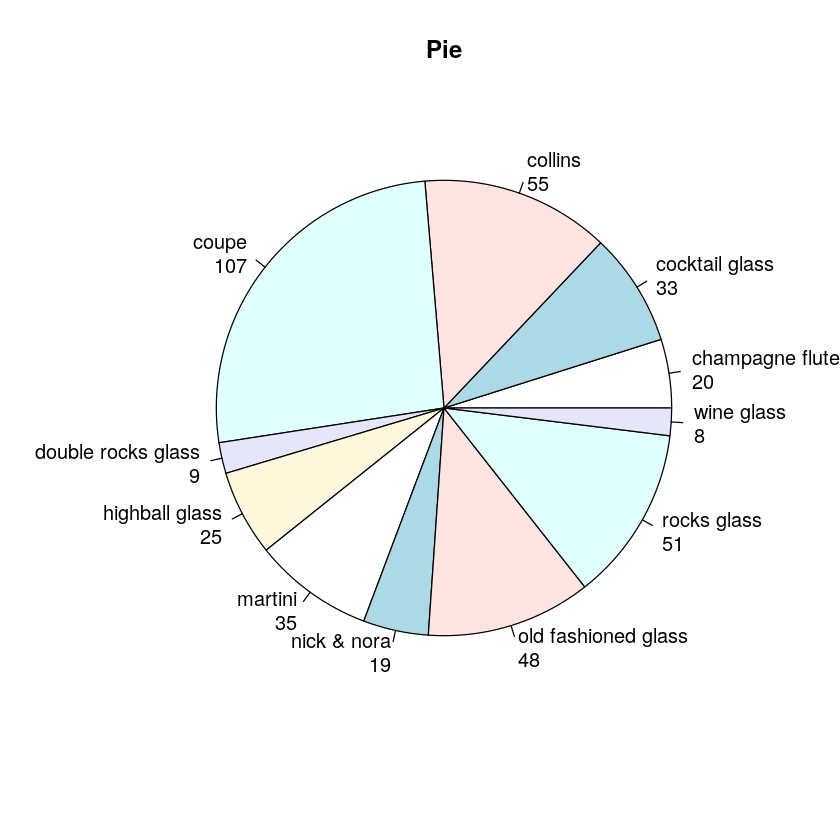

In [122]:
create_pie(cocktails_clean$Glassware)

### OfficialRating

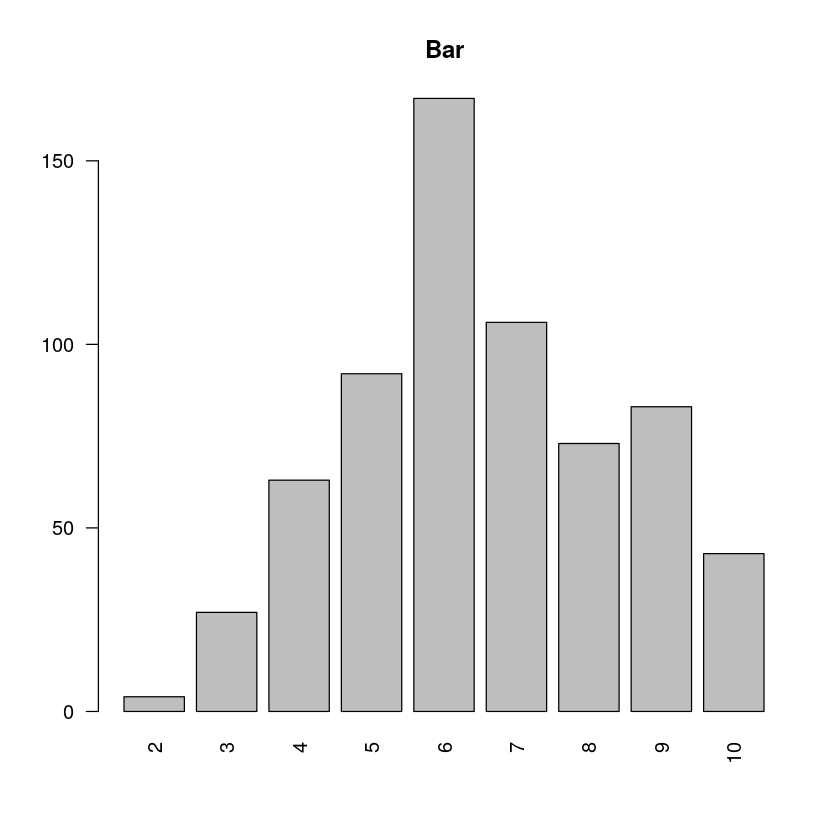

In [123]:
create_bar(cocktails$OfficialRating)

### AgeOfBartender

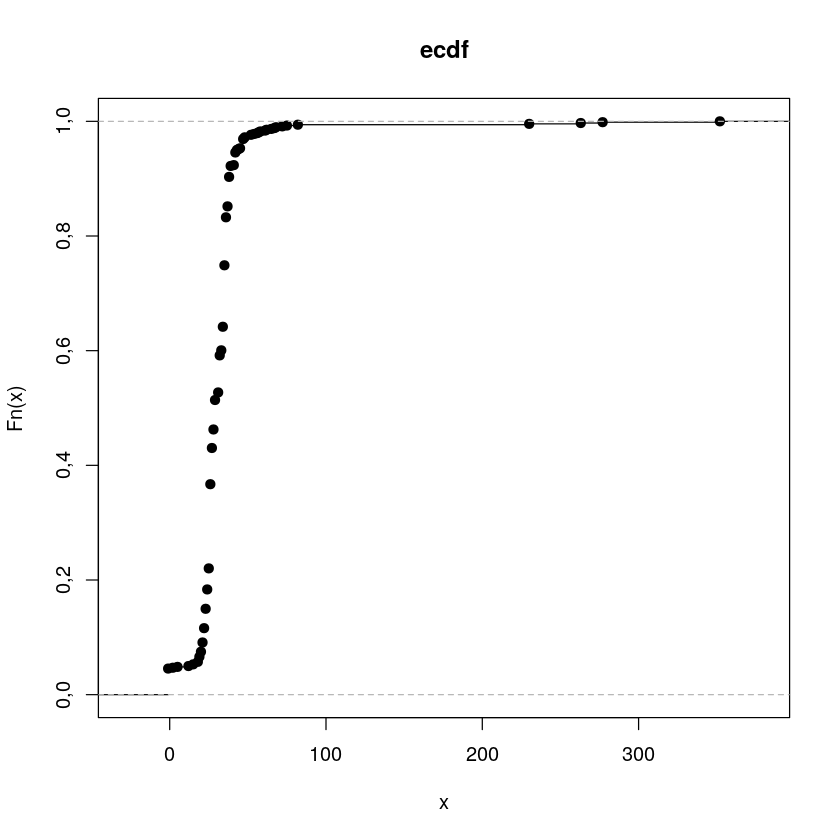

In [173]:
create_ecdf(cocktails$AgeOfBartender)

In [177]:
cocktails_clean$AgeOfBartender[cocktails_clean$AgeOfBartender > 120 | cocktails_clean$AgeOfBartender < 18 ] <- NA

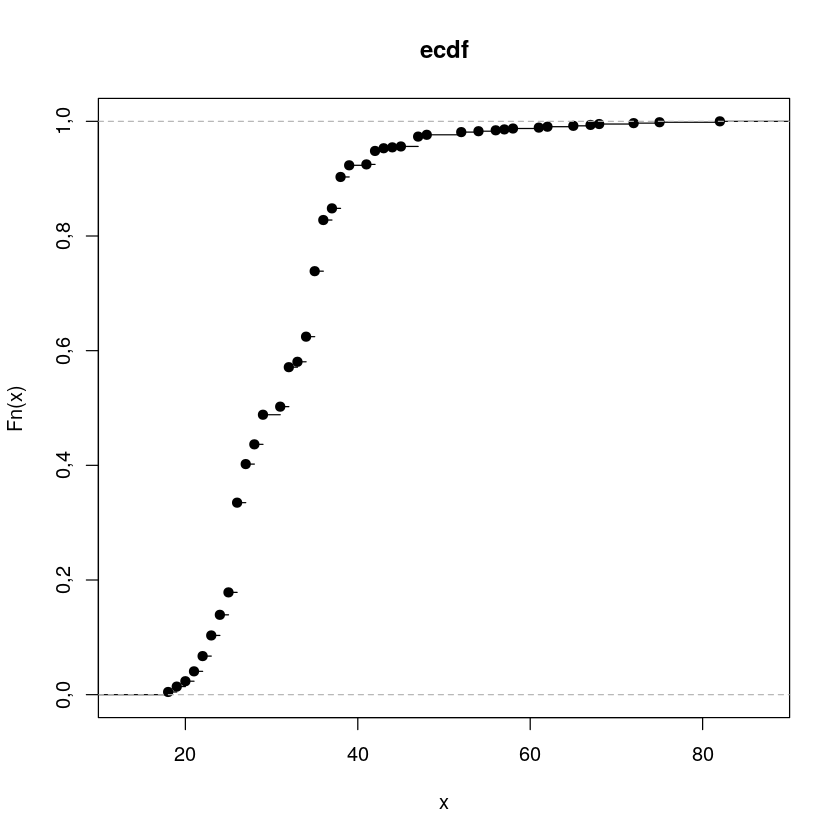

In [180]:
create_ecdf(cocktails_clean$AgeOfBartender)

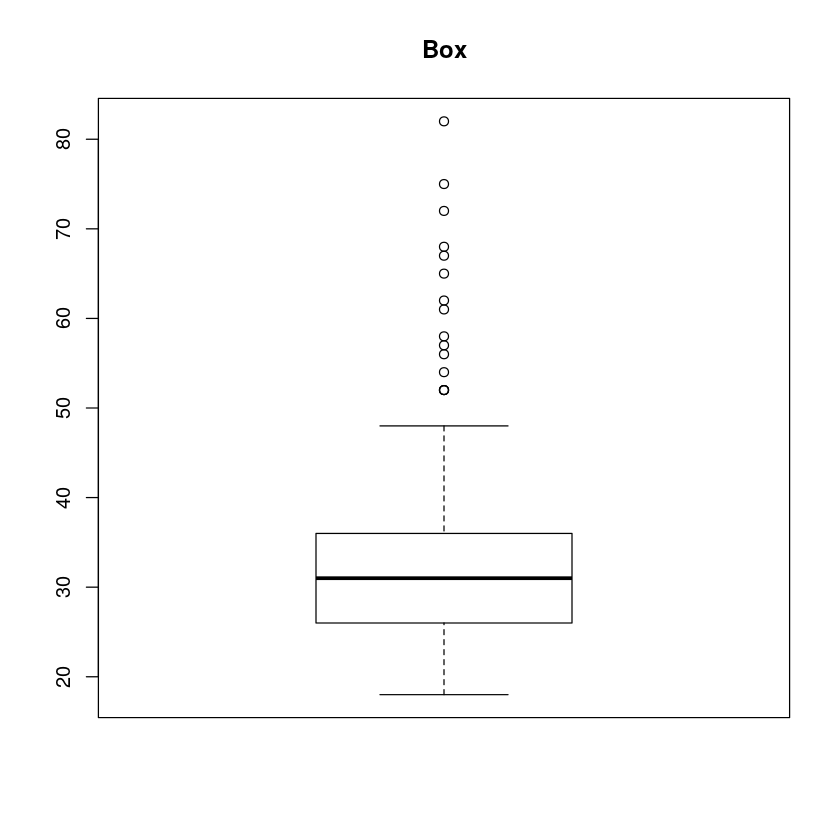

In [193]:
create_box(cocktails_clean$AgeOfBartender)

### CocktailName, Bartender, Company

In [204]:
cocktails_clean$CoktailName[cocktails_clean$CoktailName == "" | cocktails_clean$CoktailName == "nan" | cocktails_clean$CoktailName == "n/a" | cocktails_clean$CoktailName == "na" | cocktails_clean$CoktailName == "null"] <- NA
cocktails_clean$Bartender[cocktails_clean$Bartender == "" | cocktails_clean$Bartender == "nan" | cocktails_clean$Bartender == "n/a" | cocktails_clean$Bartender == "na" | cocktails_clean$Bartender == "null"] <- NA
cocktails_clean$Company[cocktails_clean$Company == "" | cocktails_clean$Company == "nan" | cocktails_clean$Company == "n/a" | cocktails_clean$Company == "na" | cocktails_clean$Company == "null"] <- NA

In [ ]:
desc_stat(cocktails_clean)

## 6. Adattranszformáció

In [198]:
cocktails_clean <- cocktails_clean %>% mutate(AgeCategory=cut(AgeOfBartender, breaks=c(18, 30, 40, 50, Inf), labels=c("18-30","30-40","40-50","50+")))

In [200]:
head(cocktails_clean)

CoktailName,Bartender,Company,Location,Glassware,OfficialRating,AgeOfBartender,AgeCategory
nara mule,eduardo val naval,a japanese kirikata,spain,highball glass,8,28,18-30
venetian,,absinthe brasserie & bar,san francisco,n/a,6,32,30-40
gin n' celery,,abv,san francisco,double rocks glass,6,43,40-50
buster crusta,ryan fitzgerald,abv,san francisco,coupe,7,19,18-30
where's the orgeat?,jackie goldstein,abv,san francisco,coupe,7,42,40-50
kentucky mai tai,,ace hotel,los angeles,highball glass,5,23,18-30


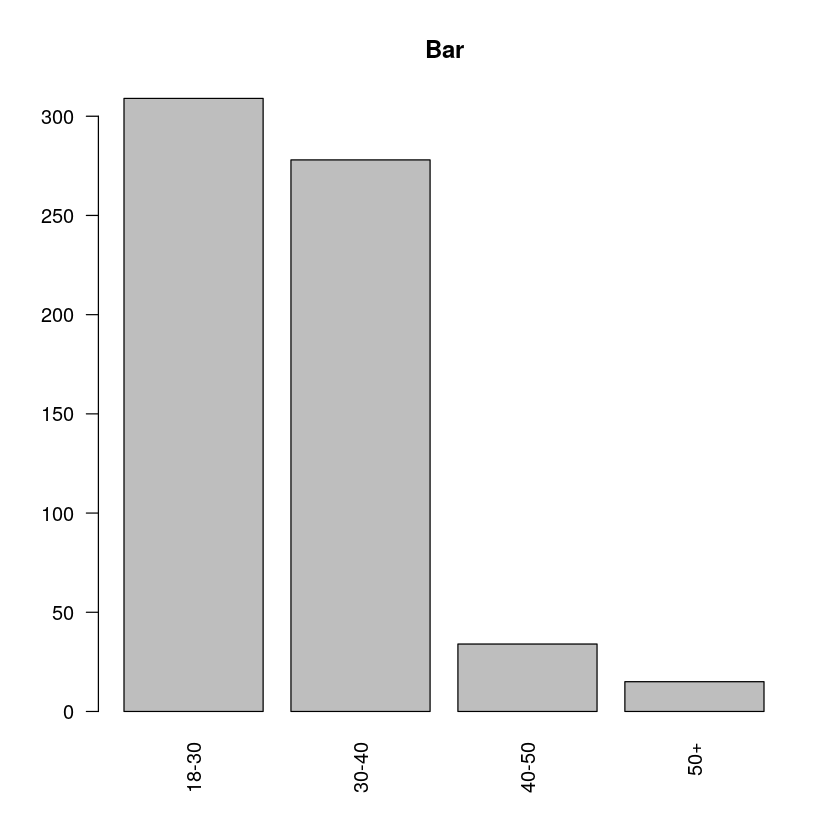

In [201]:
create_bar(cocktails_clean$AgeCategory)